In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

figsize = (14, 3.5)

# Exercise: Seoul Bike Sharing

## Context

<center>
<img src="assets/bike_sharing.jpg" width=60%/>    
</center>

Let's consider again our bike demand estimation problem

## About the Data

**We will load the data as usual:**

In [2]:
import pandas as pd
import os

fname = os.path.join('data', 'SeoulBikeData.csv')
data = pd.read_csv(fname, sep=',')

num_input = ['Temperature(^C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(^C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
cat_input = ['Hour', 'Seasons', 'Holiday', 'Functioning Day']
output = 'Rented Bike Count'

data_flt = data[num_input + cat_input + [output]].copy()
for cname in cat_input:
    data_flt[cname] = data_flt[cname].astype('category').cat.codes

data_flt.head()

,Temperature(^C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(^C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour,Seasons,Holiday,Functioning Day,Rented Bike Count
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,3,1,1,254
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,3,1,1,204
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2,3,1,1,173
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,3,1,1,107
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,3,1,1,78


* Most numeric feature do not appear to have a strong linear impact on the output
* As a consequence, the effectiveness of Linear Regression was limited

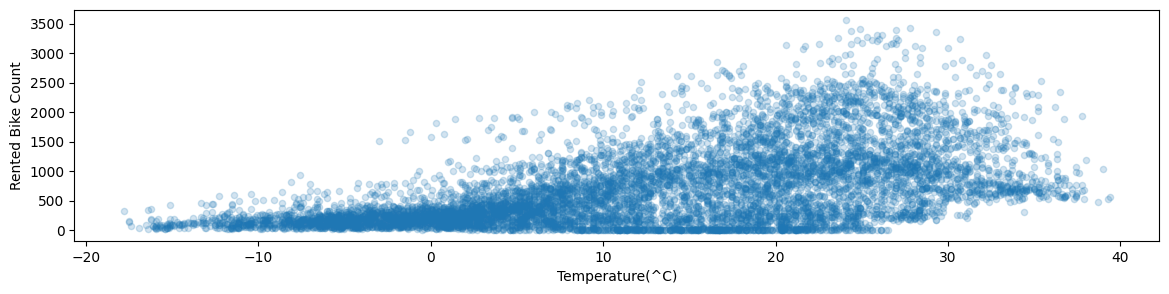

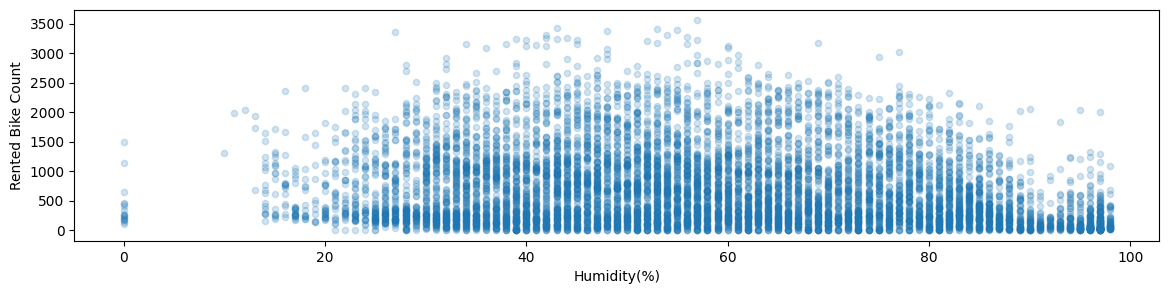

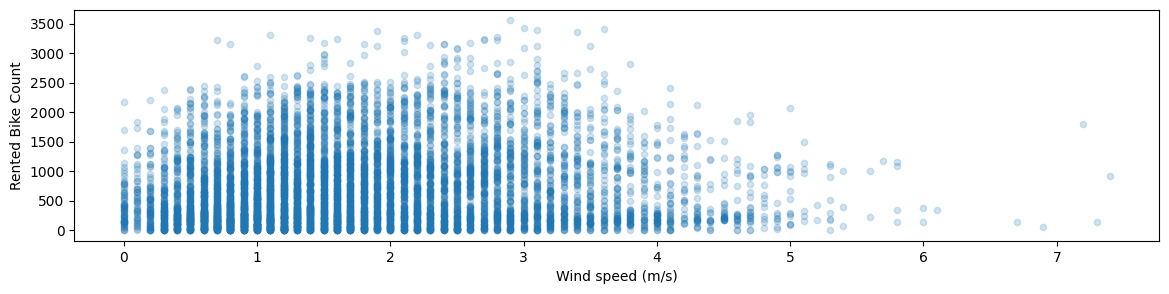

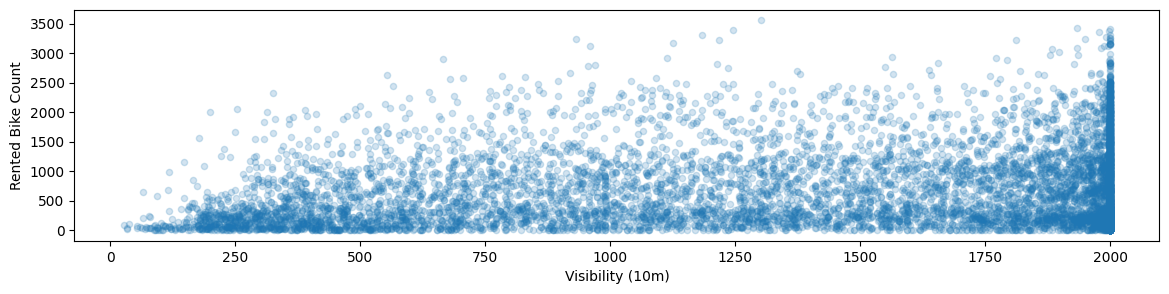

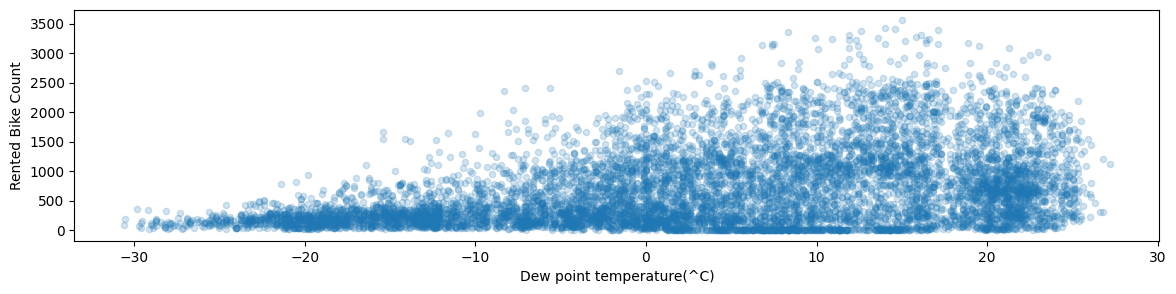

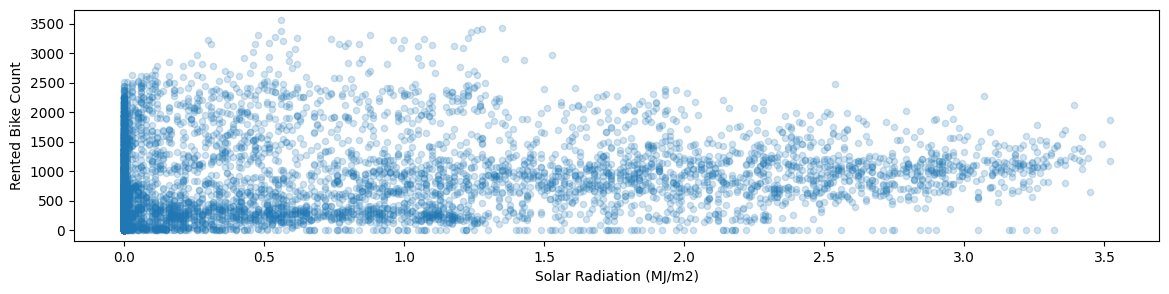

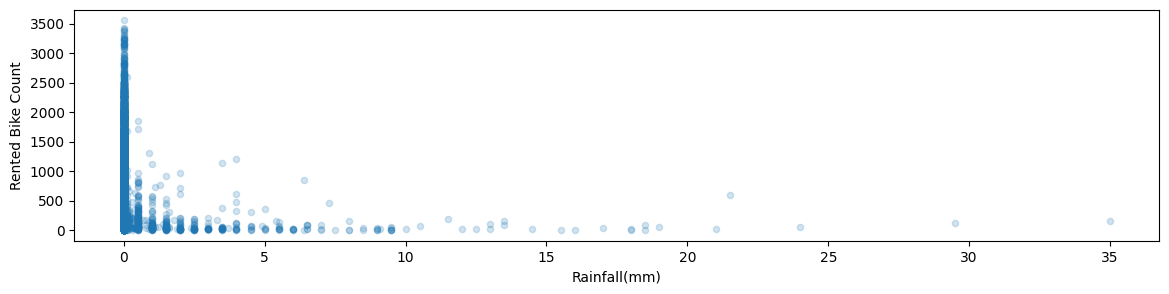

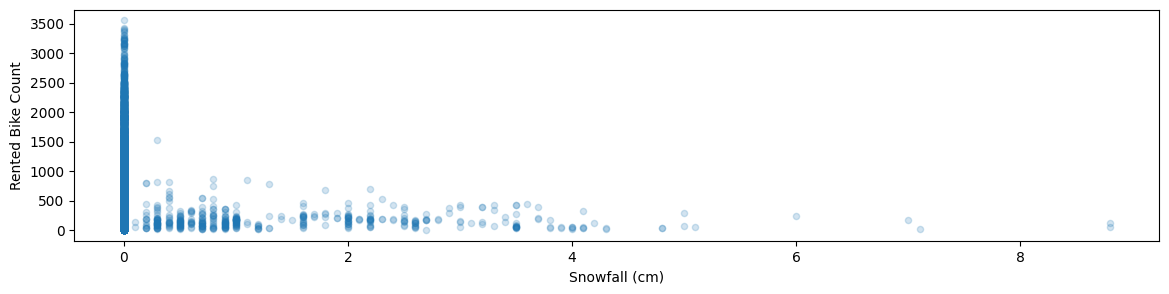

In [3]:
for cname in num_input:
    data.plot.scatter(x=cname, y=output, figsize=(14, 3), alpha=0.2)

## A Decision Tree Based Approach

**However, with a DT we can directly model non-linear correlation**

First, we perform the train-test split as usual

In [4]:
from sklearn.model_selection import train_test_split

X = data_flt[num_input + cat_input]
#y = data_flt[output] # We use a list, so we obtain a DataFrame

import numpy as np
y = np.log(data_flt[output]+0.1) # We use a list, so we obtain a DataFrame

test_set_fraction = .34
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=test_set_fraction, random_state=42)

print(f"Number of training examples: {len(X_tr)}")
print(f"Number of test examples: {len(X_ts)}")

Number of training examples: 5781
Number of test examples: 2979


Then, try to:

* Learn a Decision Tree regressor
* Calibrate its depth by using grid search

Some open questions:

* What happens if we apply a log transformation on the output?